# movie data 분석

## 목적
- 영화 데이터 분포 확인
- WITM 설계 시 어떻게 분류할 건지 예측

### 장르 별 분석 결과

In [111]:
import json
import csv
from pprint import pprint

json_file = './data/movie.json'
database = []
with open(json_file, 'r', encoding='utf-8') as file:
    data = json.load(file)

    for movie in data:
        database.append(movie.get('fields'))
# pprint(database)
df = pd.DataFrame(database)
df

,title,overview,movie_id,adult,popularity,poster_path,genres,actors,director,producer,video,Provider
0,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",823464,False,3384,/4z1VMmlxHrziG45901esjB4dpIa.jpg,"[1, 2, 15]","[1396, 1397, 1398, 1399, 1400, 1401, 1402, 140...",[342],"[369, 658, 659, 660, 661, 662]","[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]","[4, 7, 8]"
1,Rise of the Planet of the Apes,A highly intelligent chimpanzee named Caesar h...,61791,False,529,/ik3cempRee837ETSXUYCGpDyzN7.jpg,"[1, 7, 15, 17]","[1406, 1407, 1408, 1409, 1410, 1411, 1412, 141...",[343],"[663, 664, 665, 666]",[37],"[4, 7, 8]"
2,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,359410,False,543,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,"[1, 17]","[1440, 1441, 1442, 1443, 1444, 1445, 1446, 144...",[344],[67],[],[]
3,Gravity,"Dr. Ryan Stone, a brilliant medical engineer o...",49047,False,368,/u8ffl7CRAS12KA8eQEtkLuHg8Fm.jpg,"[7, 15, 17]","[1457, 1458, 1459, 1460]",[345],"[667, 668]",[38],"[4, 7, 8]"
4,The Long Game,"In a segregated Texas, five Mexican-American t...",1079810,False,441,/eVWHzm6bL4ybAuRLqA10Qo7ACfN.jpg,"[7, 8]","[1461, 1462, 1463, 1464, 1465, 1466, 1467, 146...",[346],"[669, 670, 671, 672]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
948,스턴트맨,잠수 이별을 택하고 후회뿐인 날을 보내던 스턴트맨 ‘콜트’(라이언 고슬링) 영화감독...,746036,False,262,/aUZ176q7ldMaPLYVnmaFWK4CApE.jpg,"[1, 4]","[2564, 2704, 3149, 5634, 8113, 8114, 8115, 811...",[605],"[1127, 1128, 1129, 1130]",[1202],[]
949,남은 인생 10년,"스무 살이 되던 해, 수 만명 중 1명이 걸리는 난치병으로 10년의 삶을 선고받은 ...",876797,False,34,/y2Ucvit19UUfsdLKlYyDz2ZfToS.jpg,"[7, 14]","[8131, 8132, 8133, 8134, 8135, 8136, 8137, 813...",[609],[],[],"[4, 7]"
950,"포켓몬스터: 성도지방 이야기, 최종장","결승 토너먼트에서 만난 숙명의 라이벌, ‘지우’ vs ‘바람’! 성도지방에서 8개...",1266533,False,5,/yhSyHc8dyFFu2flWizVmxWVhuLt.jpg,"[2, 3, 8, 9]",[],[606],[],"[1203, 1204, 1205, 1206]",[]
951,악마와의 토크쇼,"1977년 핼러윈 전날 밤, 시청률을 위해서라면 일단 틀고 보는 방송국 놈들 때문에...",938614,False,221,/5nUu9y8hQtmW4Qt5GWZZATCjFnN.jpg,[11],"[8122, 8123, 8124, 8125, 8126, 8127, 8128, 812...","[607, 608]","[1131, 1132, 1133, 1134, 1135, 1136]","[1207, 1208, 1209]",[]


In [112]:
json_file = './data/genre.json'
genres = []
with open(json_file, 'r', encoding='utf-8') as file:
    data = json.load(file)
    # pprint(data)
    for movie in data:
        genres.append(movie.get('fields'))
# import dataframe_image as dfi
genres_data = pd.DataFrame(genres)
genres_data
# dfi.export(genres_data, 'genre.png', max_cols=-1, max_rows=-1)

,genre_id,genre_name
0,28,액션
1,12,모험
2,16,애니메이션
3,35,코미디
4,80,범죄
5,99,다큐멘터리
6,18,드라마
7,10751,가족
8,14,판타지
9,36,역사


In [104]:
df_exploded = df.explode('genres')
count = df_exploded['genres'].value_counts()
count_table = pd.DataFrame(count)

count_table

import dataframe_image as dfi
dfi.export(count_table, 'count.png', max_cols=-1, max_rows=-1)

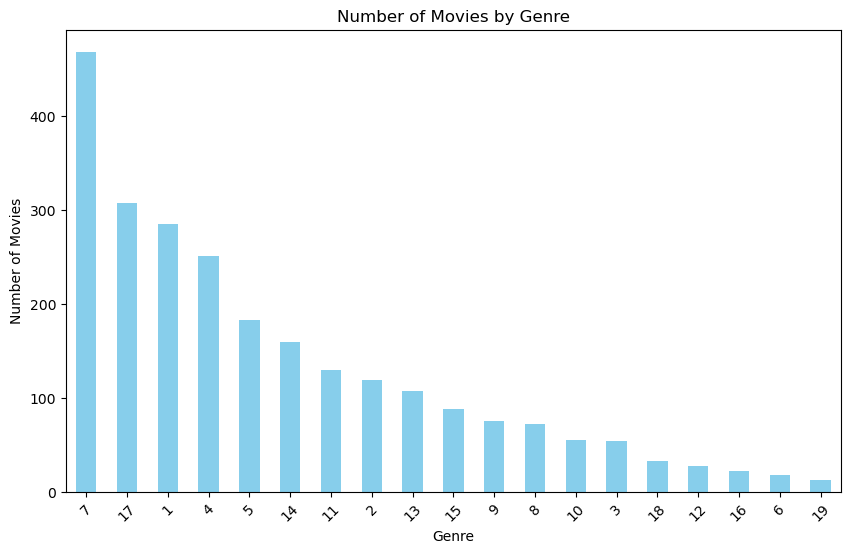

In [94]:
import matplotlib.pyplot as plt
# 시각화
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [109]:
df

,title,overview,movie_id,adult,popularity,poster_path,genres,actors,director,producer,video,Provider
0,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",823464,False,3384,/4z1VMmlxHrziG45901esjB4dpIa.jpg,"[1, 2, 15]","[1396, 1397, 1398, 1399, 1400, 1401, 1402, 140...",[342],"[369, 658, 659, 660, 661, 662]","[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]","[4, 7, 8]"
1,Rise of the Planet of the Apes,A highly intelligent chimpanzee named Caesar h...,61791,False,529,/ik3cempRee837ETSXUYCGpDyzN7.jpg,"[1, 7, 15, 17]","[1406, 1407, 1408, 1409, 1410, 1411, 1412, 141...",[343],"[663, 664, 665, 666]",[37],"[4, 7, 8]"
2,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,359410,False,543,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,"[1, 17]","[1440, 1441, 1442, 1443, 1444, 1445, 1446, 144...",[344],[67],[],[]
3,Gravity,"Dr. Ryan Stone, a brilliant medical engineer o...",49047,False,368,/u8ffl7CRAS12KA8eQEtkLuHg8Fm.jpg,"[7, 15, 17]","[1457, 1458, 1459, 1460]",[345],"[667, 668]",[38],"[4, 7, 8]"
4,The Long Game,"In a segregated Texas, five Mexican-American t...",1079810,False,441,/eVWHzm6bL4ybAuRLqA10Qo7ACfN.jpg,"[7, 8]","[1461, 1462, 1463, 1464, 1465, 1466, 1467, 146...",[346],"[669, 670, 671, 672]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
948,스턴트맨,잠수 이별을 택하고 후회뿐인 날을 보내던 스턴트맨 ‘콜트’(라이언 고슬링) 영화감독...,746036,False,262,/aUZ176q7ldMaPLYVnmaFWK4CApE.jpg,"[1, 4]","[2564, 2704, 3149, 5634, 8113, 8114, 8115, 811...",[605],"[1127, 1128, 1129, 1130]",[1202],[]
949,남은 인생 10년,"스무 살이 되던 해, 수 만명 중 1명이 걸리는 난치병으로 10년의 삶을 선고받은 ...",876797,False,34,/y2Ucvit19UUfsdLKlYyDz2ZfToS.jpg,"[7, 14]","[8131, 8132, 8133, 8134, 8135, 8136, 8137, 813...",[609],[],[],"[4, 7]"
950,"포켓몬스터: 성도지방 이야기, 최종장","결승 토너먼트에서 만난 숙명의 라이벌, ‘지우’ vs ‘바람’! 성도지방에서 8개...",1266533,False,5,/yhSyHc8dyFFu2flWizVmxWVhuLt.jpg,"[2, 3, 8, 9]",[],[606],[],"[1203, 1204, 1205, 1206]",[]
951,악마와의 토크쇼,"1977년 핼러윈 전날 밤, 시청률을 위해서라면 일단 틀고 보는 방송국 놈들 때문에...",938614,False,221,/5nUu9y8hQtmW4Qt5GWZZATCjFnN.jpg,[11],"[8122, 8123, 8124, 8125, 8126, 8127, 8128, 812...","[607, 608]","[1131, 1132, 1133, 1134, 1135, 1136]","[1207, 1208, 1209]",[]
